In [50]:
import sys
import warnings
import random

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import mixture

In [51]:
import astrobf

from astrobf import tGMM

from astrobf.tGMM import truncated_em, likelihood_estimation, moments_estimation, parameters_initialization

Step #1: Generating a Gaussian-Mixture-Model dataset
True parameters:
pp: 
[ 0.2  0.3  0.5]

mu: 
[[ 10.  -1.]
 [ 20.  20.]
 [ -3.   3.]]

sigma: 
[[[  5.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.   5.]]]


********************************************************************************
Step #2: Censoring and truncating the data

********************************************************************************
Step #3: Initializing parameters using K-means

********************************************************************************
Step #4: Estimating parameters using truncated and censored EM


KeyboardInterrupt: 

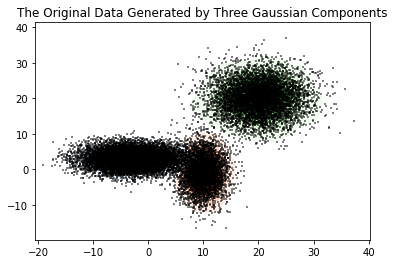

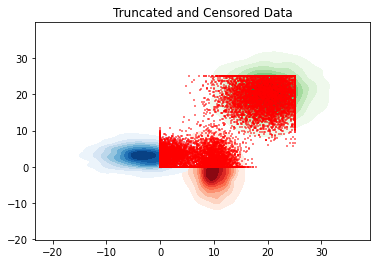

In [52]:
import sys
import warnings

import numpy as np

from astrobf.tGMM.experiments import perform_bivariate_3_gaussians_exp

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    

def main(argv):
    # Number of data points
    N = 100000

    # Define the true values of mixture weights
    pp = np.array([0.5, 0.2, 0.3])

    # Define Gaussian components
    mu_1 = np.array([-3., 3.])
    mu_2 = np.array([10., -1.])
    mu_3 = np.array([20., 20.])
    sigma_1 = np.diag([20., 5.])
    sigma_2 = np.diag([5., 20.])
    sigma_3 = np.diag([20., 20.])

    # Define the truncation and censoring bounds
    truncation_bounds = np.array([0.1, np.inf])
    censoring_bounds = np.array([[0], [np.inf]])

    # Start the experiment 
    perform_bivariate_3_gaussians_exp(N, pp, mu_1, mu_2, mu_3,
                                      sigma_1, sigma_2, sigma_3,
                                      truncation_bounds, censoring_bounds)

if __name__ == "__main__":
    main(sys.argv)


In [53]:
# Number of data points
N = 100000

# Define the true values of mixture weights
pp = np.array([0.5, 0.2, 0.3])

# Define Gaussian components
mu_1 = np.array([-3., 3.])
mu_2 = np.array([10., -1.])
mu_3 = np.array([20., 20.])
sigma_1 = np.diag([20., 5.])
sigma_2 = np.diag([5., 20.])
sigma_3 = np.diag([20., 20.])

# Define the truncation and censoring bounds
truncation_bounds = np.array([0.1, np.inf])
censoring_bounds = np.array([[0], [25]])

# Start the experiment 
perform_univariate_3_gaussians_exp(N, pp, mu_1, mu_2, mu_3,
                                  sigma_1, sigma_2, sigma_3,
                                  truncation_bounds, censoring_bounds)


NameError: name 'perform_univariate_3_gaussians_exp' is not defined

In [ ]:
def reorder_gmm_compoments_1D(pp, mu, sigma):
    """Re-order GMM components based on their mixing weights.

    Args:
        pp (1D numpy array): The mixing weights of GMM.
        mu (1D numpy array): The means of components of GMM.
        sigma (1D numpy array): The covariances of components of GMM.

    Returns:
        new_pp (1D numpy array): The re-ordered mixing weights of GMM.
        new_mu (1D numpy array): The re-ordered means of components of GMM.
        new_sigma (1D numpy array): The re-ordered covariances of components
            of GMM.
    """
    idx = pp.argsort()
    new_pp = pp[idx]
    new_mu = mu[idx]
    new_sigma = sigma[idx]

    return new_pp, new_mu, new_sigma

In [45]:
def generate_gmm_data_1D(pi, mu, sigma, N):
    """Generate synthetic data based on Gaussian Mixture Model (GMM).
    
    Args:
        pi (1D numpy array): The mixing weights.
        mu (1D numpy array): The means of Gaussian components.
        sigma (1D numpy array): The covariance matrices of Gaussian components.
        N (int): The number of generated data points.
        
    Returns:
        x (2D numpy array): The generated data points.
    """
    # Get the number of components
    K = pi.shape[0]

    # Get the number of dimensions
    #D = mu.shape[0] # == 1

    # Get the component weights, add 0 at the beginning, and get rid of the last element. WHY???
    pi = np.concatenate(([0], np.cumsum(pi[:-1])))/np.sum(pi)

    # Generate the latent variables
    z = np.sum(np.random.uniform(size=[N, 1]) > np.tile(pi, (N, 1)), axis=1) - 1
    print(z)
    
    # Generate dataset
    x = np.zeros(N)

    for k in range(K):
        x[z == k] = np.random.normal(mu[k], 
                                     sigma[k], 
                                     np.sum(z==k))
        
    return x

mu_1 = np.array([-3., 3.])
mu_2 = np.array([10., -1.])
mu_3 = np.array([20., 20.])
mu = np.stack([mu_1, mu_2, mu_3], axis=0)

sigma_1 = np.diag([20., 5.])
sigma_2 = np.diag([5., 20.])
sigma_3 = np.diag([20., 20.])
sigma = np.stack([sigma_1, sigma_2, sigma_3], axis=2)

pi = np.array([1,1,1])
mu = np.array([-1, 0.8, 1.3])
sigma = np.array([0.1, 0.1, 0.1])
N = 10000
X = generate_gmm_data_1D(pi, mu, sigma, N)

[2 2 1 ..., 0 2 1]


(array([   4.,    2.,   12.,   15.,   36.,   65.,  106.,  171.,  222.,
         327.,  358.,  430.,  383.,  329.,  272.,  217.,  152.,   93.,
          52.,   27.,    9.,    8.,    6.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    4.,
          13.,   34.,   62.,  101.,  161.,  208.,  311.,  366.,  385.,
         379.,  352.,  313.,  240.,  176.,  108.,   73.,   39.,   42.,
          46.,   75.,  115.,  180.,  257.,  337.,  364.,  387.,  362.,
         352.,  281.,  212.,  167.,   83.,   61.,   37.,   11.,    6.,    3.]),
 array([-1.3516867 , -1.32182538, -1.29196406, -1.26210274, -1.23224142,
        -1.2023801 , -1.17251878, -1.14265746, -1.11279614, -1.08293481,
        -1.05307349, -1.02321217, -0.99335085, -0.96348953, -0.9

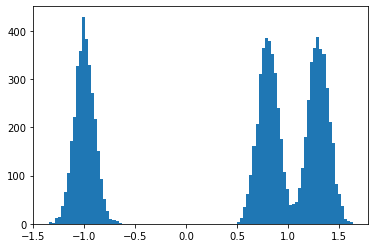

In [46]:
plt.hist(X, bins=100)

In [71]:
def plot_gmm_data_1D(x, mu, sigma, pi, num_points=2000, point_color="red"):
    """Plot the gaussian mixture model data.
    
    Args:
        x (1D numpy array): The data set.
        mu (1D numpy array): The means of the data.
        sigma (1D numpy array): The covariance of the data.
        num_points (int): Number of data points used to estimate kde.
        point_color (string): The color of datapoints.
        
    Returns:
        ax (AxesSubplot object): The plotting object.
    """
    K = mu.shape[0]
    cmaps = ["Reds", "Greens", "Blues"]
    
    # Generate data points for each cluster
    models = []
    for k in range(K):
        models.append(sp.stats.norm(mu[k], sigma[k]))

    # Plot the clusters
    for k in range(K):
        xp = np.arange(mu[k]-5*sigma[k], mu[k]+5*sigma[k], 0.1*sigma[k])
        ax = plt.plot(xp, pi[k]*models[k].pdf(xp))
        
    # Plot the data points
    plt.hist(x, fc=point_color, alpha=0.5, density=True, bins=200)
    
    return ax


In [73]:
def censor_and_truncate_data_1D(y, c_up=25, c_low=0, t_up=np.inf, t_low=0):
    """Perform censoring and truncation on the data.
        NOTE
        ----
            Censoring : data points are NOT missing, but hava incorrect, lower/upper bound values
            Truncation : data points below/above limits are missing 
    
    Args:
        y (1D numpy array): The original data.
        c_up (float): The upper censoring bound.
        c_low (float): The lower censoring bound.
        t_up (float): The upper truncation bound.
        t_low (float): The lower truncation bound.
        
    Returns:
        x (1D numpy array): The censored and truncated data.
    """
    # Truncation index (only truncate the first dimension)
    idxt = y > t_low

    # Censoring index
    idxcu = y > c_up
    idxcl = y < c_low

    # Perform censoring
    x = y
    x[idxcu] = c_up
    x[idxcl] = c_low

    # Then perform truncation
    x = x[idxt]

    return x


## GMM initialization 
We use K-means to initialize GMM parameters search. There probably be other options. 

In [93]:
from sklearn.cluster import KMeans
def init_kmeans_1D(x, K):
    """Initialize parameters for EM.
    
    Args:
        x (1D numpy array): The data points.
        K (int): The number of Gaussian component.
        
    Returns:
        parameters (Dictionaries): The dictionary containing the initialized
            parameters
    """
    # Get the number of data points and the number of dimensions
    N = x.shape[0]
    try:
        D = x.shape[1]
    except:
        D = 1

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=K).fit(x)
    idx = kmeans.labels_
    cent = kmeans.cluster_centers_

    # Estimate parameters corresponding each component (cluster)
    pp = np.zeros([K])
    mu = np.zeros([K, D])
    sigma = np.zeros([D, D, K])

    for k in range(K):
        pp[k] = (idx==k).sum()
        mu[k, :] = cent[k, :]
        if pp[k]:
            sigma[:, :, k] = np.cov(x[idx==k, :].T)
    
    # Store the parameters
    parameters = {
        'pp' : pp / N,
        'mu' : mu,
        'sigma' : sigma
    }

    return parameters

In [ ]:
def perform_univariate_3_gaussians_exp(N, pp, mu_1, mu_2, mu_3,
                                      sigma_1, sigma_2, sigma_3, 
                                      truncation_bounds, censoring_bounds,
                                      max_iteration=50, seed=100):
    """Perform experiment on bivariate dataset generated from 3 Gaussians.

    Args:
        N (int): 
        pp (1D numpy array): The mixing weights.
        mu_1 float: The mean corresponding of the Gaussian 1.
        mu_2 float: The mean corresponding of the Gaussian 2.
        mu_3 float: The mean corresponding of the Gaussian 3.
        sigma_1 float: variance of the Gaussian 1.
        sigma_2 float: variance of the Gaussian 2.
        sigma_3 float: variance of the Gaussian 3.
        truncation_bounds (1D numpy array): The truncation bounds applied on the
            dataset.
        censoring_bounds (1D numpy array): The censoring bounds applied on the
            dataset.
        max_iteration (int): The maximum number of iterations.
        seed (int): The random seed for reproducibility.
    """
    

Step #1: Generating a Gaussian-Mixture-Model dataset
True parameters:
pp: 
[ 0.2  0.3  0.5]

mu: 
[-1.   0.8  1.3]

sigma: 
[ 0.1  0.1  0.1]

[2 0 2 ..., 2 1 2]

********************************************************************************


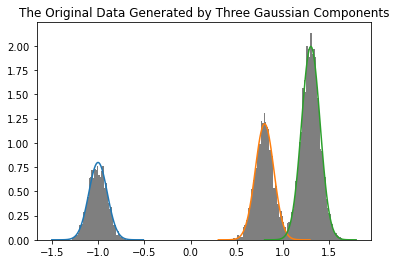

In [72]:
    pi = np.array([1,1,1])
    mu = np.array([-1, 0.8, 1.3])
    sigma = np.array([0.1, 0.1, 0.1])
    N = 10000
    max_iteration=59
    seed = 1000

    # Fix the random state
    random.seed(seed)
    np.random.seed(seed)

    # Stack and reorder the means and covariance matrices into unified matrices
    pp, mu, sigma = reorder_gmm_compoments_1D(pp, mu, sigma)
    K = mu.shape[0]

    # Generate GMM data
    print("Step #1: Generating a Gaussian-Mixture-Model dataset")
    print("True parameters:")
    print("pp: \n{}\n".format(pp))
    print("mu: \n{}\n".format(mu))
    print("sigma: \n{}\n".format(sigma.T))
    y = generate_gmm_data_1D(pp, mu, sigma, N)

    # Plot the GMM data
    plt.figure()
    ax = plot_gmm_data_1D(y, mu, sigma, pp, point_color='black')
    plt.title("The Original Data Generated by Three Gaussian Components")
    print("\n" + "*"*80)

Step #2: Censoring and truncating the data

********************************************************************************
Step #3: Initializing parameters using K-means


ValueError: Expected 2D array, got 1D array instead:
array=[ 1.22198231  0.          1.48308392 ...,  1.09583401  0.77470689
  1.25226835].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

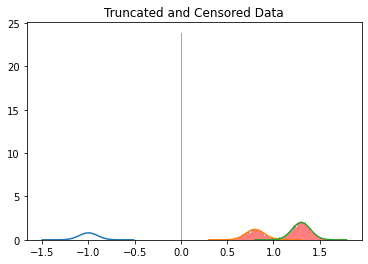

In [94]:
    # Perform censoring and truncation on the original data
    print("Step #2: Censoring and truncating the data")
    x = censor_and_truncate_data_1D(y, c_up=1.8, c_low=-2, t_up=np.inf, t_low=-1.2)

    # Plot the censored and truncated data
    plt.figure()
    ax = plot_gmm_data_1D(x, mu, sigma, pp, point_color='red')
    plt.title("Truncated and Censored Data")
    print("\n" + "*"*80)

    # Init parameters using K-means
    print("Step #3: Initializing parameters using K-means")
    par = init_kmeans_1D(x, K)
    print("\n" + "*"*80)

    ## --------- test data ready -----------
    
    # Estimating parameters using truncated and censored EM
    print("Step #4: Estimating parameters using truncated and censored EM")
    tc_em_results = perform_truncated_em(x, K, 
                                         truncation_bounds, censoring_bounds, 
                                         par['pp'], par['mu'], par['sigma'], 
                                         max_iteration)

    print("Estimated parameters by standard EM:")
    print("pp: \n{}\n".format(tc_em_results['pp']))
    print("mu: \n{}\n".format(tc_em_results['mu']))
    print("sigma: \n{}\n".format(tc_em_results['sigma'].T))
    
    plt.figure()
    plt.plot(range(len(tc_em_results['ll_hist'])), tc_em_results['ll_hist'])
    plt.title("Learning Curve of the Truncated and Censored EM")
    plt.xlabel("Iteration")
    plt.ylabel("Log-likelihood")

    plt.figure()
    ax = plot_gmm_data_1D(x, tc_em_results['mu'], tc_em_results['sigma'], tc_em_results['pp'])
    plt.title("Truncated and Censored EM")
    print("\n" + "*"*80)

    print("Step #5: Estimating parameters using standard EM")
    std_em_results = perform_standard_em(x, K, seed)

    print("Estimated parameters by standard EM:")
    print("pp: \n{}\n".format(std_em_results['pp']))
    print("mu: \n{}\n".format(std_em_results['mu']))
    print("sigma: \n{}\n".format(std_em_results['sigma'].T))

    plt.figure()
    ax = plot_gmm_data_1D(x, std_em_results['mu'], std_em_results['sigma'], std_em_results['pp'])
    plt.title("Standard EM")
    print("\n" + "*"*80)

    # Evaluate the KL-Divergence between true distribution and estimated 
    # distributions
    print("Step #6: Evaluating the estimated parameters")
    pp, mu, sigma = reorder_gmm_compoments(pp, mu, sigma)
    tc_em_results['pp'], tc_em_results['mu'], tc_em_results['sigma'] =\
        reorder_gmm_compoments(tc_em_results['pp'], tc_em_results['mu'],
                               tc_em_results['sigma'])
    std_em_results['pp'], std_em_results['mu'], std_em_results['sigma'] =\
        reorder_gmm_compoments(std_em_results['pp'], std_em_results['mu'],
                               std_em_results['sigma'])
                               
    true_gmm = build_GMM_model(pp, mu, sigma, seed)
    tc_gmm = build_GMM_model(tc_em_results['pp'], tc_em_results['mu'],
                             tc_em_results['sigma'], seed)
    std_gmm = build_GMM_model(std_em_results['pp'], std_em_results['mu'],
                              std_em_results['sigma'], seed)
                              
    tc_kl = estimate_kl_divergence_gmm(true_gmm, tc_gmm)
    std_kl = estimate_kl_divergence_gmm(true_gmm, std_gmm)    

    print("\t* KL-Divergence corresponding to truncated and censored EM: {}".\
        format(tc_kl))
    print("\t* KL-Divergence corresponding to standard EM: {}".\
        format(std_kl))
    print("\n" + "*"*80)

    # Show the plots
    print("Step #7: Showing the plots")
    plt.show()

In [12]:
seed = 123
N = 100000

# Define the true values of mixture weights
pp = np.array([0.5, 0.2, 0.3])

# Define Gaussian components
mu_1 = np.array([-3., 3.])
mu_2 = np.array([10., -1.])
mu_3 = np.array([20., 20.])
sigma_1 = np.diag([20., 5.])
sigma_2 = np.diag([5., 20.])
sigma_3 = np.diag([20., 20.])

# Define the truncation and censoring bounds
truncation_bounds = np.array([0, np.inf])
censoring_bounds = np.array([[0], [25]])

In [10]:
# Fix the random state
random.seed(seed)
np.random.seed(seed)

# Stack and reorder the means and covariance matrices into unified matrices
mu = np.stack([mu_1, mu_2, mu_3], axis=0)
sigma = np.stack([sigma_1, sigma_2, sigma_3], axis=2)
pp, mu, sigma = reorder_gmm_compoments(pp, mu, sigma)
K = mu.shape[0]

# Generate GMM data
print("Step #1: Generating a Gaussian-Mixture-Model dataset")
print("True parameters:")
print("pp: \n{}\n".format(pp))
print("mu: \n{}\n".format(mu))
print("sigma: \n{}\n".format(sigma.T))
y = generate_gmm_data(pp, mu, sigma, N)

# Plot the GMM data
plt.figure()
ax = plot_gmm_data(y, mu, sigma, point_color='black')
plt.title("The Original Data Generated by Three Gaussian Components")
print("\n" + "*"*80)

# Perform censoring and truncation on the original data
print("Step #2: Censoring and truncating the data")
x = censor_and_truncate_data(y)

# Plot the censored and truncated data
plt.figure()
ax = plot_gmm_data(y, mu, sigma, point_color='red')
plt.title("Truncated and Censored Data")
print("\n" + "*"*80)

# Init parameters using K-means
print("Step #3: Initializing parameters using K-means")
par = init_kmeans(x, K)
print("\n" + "*"*80)

NameError: name 'random' is not defined

In [ ]:
tc_em_results = perform_truncated_em(x, K, 
                                     truncation_bounds, censoring_bounds, 
                                     par['pp'], par['mu'], par['sigma'], 
                                     max_iteration)

print("Estimated parameters by standard EM:")
print("pp: \n{}\n".format(tc_em_results['pp']))
print("mu: \n{}\n".format(tc_em_results['mu']))
print("sigma: \n{}\n".format(tc_em_results['sigma'].T))

plt.figure()
plt.plot(range(len(tc_em_results['ll_hist'])), tc_em_results['ll_hist'])
plt.title("Learning Curve of the Truncated and Censored EM")
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")

plt.figure()
ax = plot_gmm_data(x, tc_em_results['mu'], tc_em_results['sigma'])
plt.title("Truncated and Censored EM")
print("\n" + "*"*80)

print("Step #5: Estimating parameters using standard EM")
std_em_results = perform_standard_em(x, K, seed)

print("Estimated parameters by standard EM:")
print("pp: \n{}\n".format(std_em_results['pp']))
print("mu: \n{}\n".format(std_em_results['mu']))
print("sigma: \n{}\n".format(std_em_results['sigma'].T))

plt.figure()
ax = plot_gmm_data(x, std_em_results['mu'], std_em_results['sigma'])
plt.title("Standard EM")
print("\n" + "*"*80)

# Evaluate the KL-Divergence between true distribution and estimated 
# distributions
print("Step #6: Evaluating the estimated parameters")
pp, mu, sigma = reorder_gmm_compoments(pp, mu, sigma)
tc_em_results['pp'], tc_em_results['mu'], tc_em_results['sigma'] =\
    reorder_gmm_compoments(tc_em_results['pp'], tc_em_results['mu'],
                           tc_em_results['sigma'])
std_em_results['pp'], std_em_results['mu'], std_em_results['sigma'] =\
    reorder_gmm_compoments(std_em_results['pp'], std_em_results['mu'],
                           std_em_results['sigma'])

true_gmm = build_GMM_model(pp, mu, sigma, seed)
tc_gmm = build_GMM_model(tc_em_results['pp'], tc_em_results['mu'],
                         tc_em_results['sigma'], seed)
std_gmm = build_GMM_model(std_em_results['pp'], std_em_results['mu'],
                          std_em_results['sigma'], seed)

tc_kl = estimate_kl_divergence_gmm(true_gmm, tc_gmm)
std_kl = estimate_kl_divergence_gmm(true_gmm, std_gmm)    

print("\t* KL-Divergence corresponding to truncated and censored EM: {}".\
    format(tc_kl))
print("\t* KL-Divergence corresponding to standard EM: {}".\
    format(std_kl))
print("\n" + "*"*80)

# Show the plots
print("Step #7: Showing the plots")
plt.show()
